# Adjusting stochastic growth

TokenLab allows for maximum flexibility and control over the parameters of a simulation. In this notebook we will show some examples of how you can use the stochastic user growth controller.

In [10]:
import numpy as np
import scipy
import os
import sys
tokenlab_path=os.path.abspath("").replace('notebooks','src')
sys.path.insert(0,tokenlab_path)

from TokenLab.simulationcomponents import *
from TokenLab.simulationcomponents.usergrowthclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.tokeneconomyclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.agentpoolclasses import *
from TokenLab.simulationcomponents.pricingclasses import *
from TokenLab.simulationcomponents.supplyclasses import *
from TokenLab.simulationcomponents.addons import Condition
from utils.helpers import *
from matplotlib import pyplot as plt
import scipy.stats

The stochastic user growth controller simply samples values from a distribution. The add_to_userbase parameter determines whether the value sampled is added to the overall number of users, or whether this is the actual number of users.

For this instantatiation we are going with a Poisson distribution with a 'mu' parameter of 1000.

Let's see what results this generates.

In [11]:
ITERATIONS=60
HOLDING_TIME=HoldingTime_Adaptive(1)
SUPPLY=10**7
INITIAL_PRICE=1

usm_fiat=UserGrowth_Stochastic(user_growth_distribution=scipy.stats.poisson,
                               user_growth_dist_parameters={'mu':1000},add_to_userbase=False)

In [12]:
ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=1000,currency='$')

investors=SupplyController_InvestorDumperSpaced(dumping_initial=100,dumping_final=1000000000,num_steps=ITERATIONS)

te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)

te.add_agent_pools([ap_fiat])


True

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 70.77it/s]


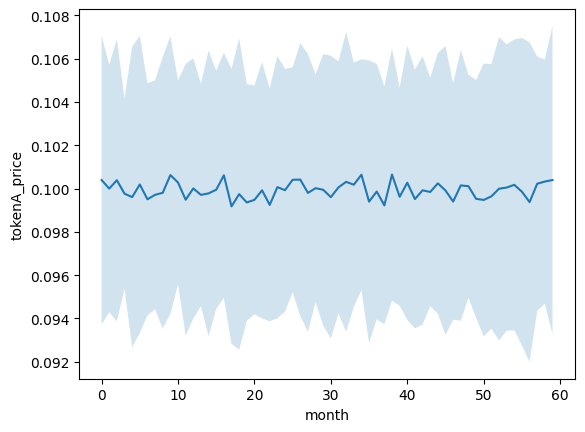

In [13]:
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

# With adding to userbase

Let's see what results we get if we set the add_to_userbase argument to True.

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 78.01it/s]


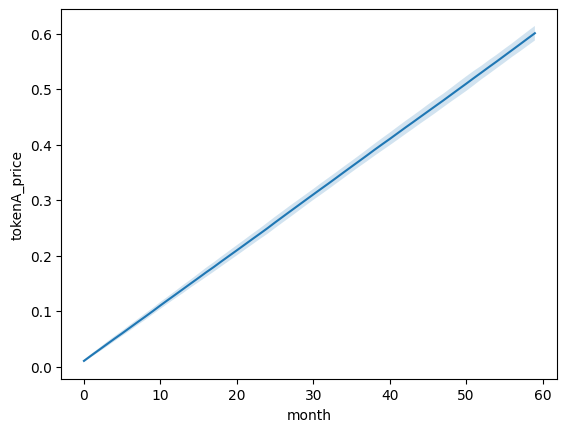

In [14]:
usm_fiat=UserGrowth_Stochastic(user_growth_distribution=scipy.stats.poisson,
                               user_growth_dist_parameters={'mu':100},add_to_userbase=True)

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=1000,currency='$')

investors=SupplyController_InvestorDumperSpaced(dumping_initial=100,dumping_final=1000000000,num_steps=ITERATIONS)

te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)

te.add_agent_pools([ap_fiat])

meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

# Use different parameters per iteration

All stochastic classes can have parameters that change per iteration. We can generate these parameter sequence using the generate_distribution_param_from_sequence function from the utils.helpers module.

The default way to produce a parameter sequence is the np.linspace method. Let's see what results this yields.

In [8]:
params=generate_distribution_param_from_sequence('mu',start=100,stop=1000,num=10)
params

[{'mu': 100.0},
 {'mu': 200.0},
 {'mu': 300.0},
 {'mu': 400.0},
 {'mu': 500.0},
 {'mu': 600.0},
 {'mu': 700.0},
 {'mu': 800.0},
 {'mu': 900.0},
 {'mu': 1000.0}]

Now let's run the same example, but with the new parameter set.

  0%|                                                    | 0/50 [00:00<?, ?it/s]/Users/stylianoskampakis/Dropbox (Personal)/Freelance/TokenLab/src/TokenLab/simulationcomponents/usergrowthclasses.py:231: UserWarning: Iterations for UserGrowth stochastic exhausted. Simply using the last item on the list of parameters.
  warnings.warn("Iterations for UserGrowth stochastic exhausted. Simply using the last item on the list of parameters.")
/Users/stylianoskampakis/Dropbox (Personal)/Freelance/TokenLab/src/TokenLab/simulationcomponents/usergrowthclasses.py:231: UserWarning: Iterations for UserGrowth stochastic exhausted. Simply using the last item on the list of parameters.
  warnings.warn("Iterations for UserGrowth stochastic exhausted. Simply using the last item on the list of parameters.")
/Users/stylianoskampakis/Dropbox (Personal)/Freelance/TokenLab/src/TokenLab/simulationcomponents/usergrowthclasses.py:231: UserWarning: Iterations for UserGrowth stochastic exhausted. Simply using the l

/Users/stylianoskampakis/Dropbox (Personal)/Freelance/TokenLab/src/TokenLab/simulationcomponents/usergrowthclasses.py:231: UserWarning: Iterations for UserGrowth stochastic exhausted. Simply using the last item on the list of parameters.
  warnings.warn("Iterations for UserGrowth stochastic exhausted. Simply using the last item on the list of parameters.")
 58%|████████████████████████▉                  | 29/50 [00:00<00:00, 68.47it/s]/Users/stylianoskampakis/Dropbox (Personal)/Freelance/TokenLab/src/TokenLab/simulationcomponents/usergrowthclasses.py:231: UserWarning: Iterations for UserGrowth stochastic exhausted. Simply using the last item on the list of parameters.
  warnings.warn("Iterations for UserGrowth stochastic exhausted. Simply using the last item on the list of parameters.")
/Users/stylianoskampakis/Dropbox (Personal)/Freelance/TokenLab/src/TokenLab/simulationcomponents/usergrowthclasses.py:231: UserWarning: Iterations for UserGrowth stochastic exhausted. Simply using the l

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 66.18it/s]


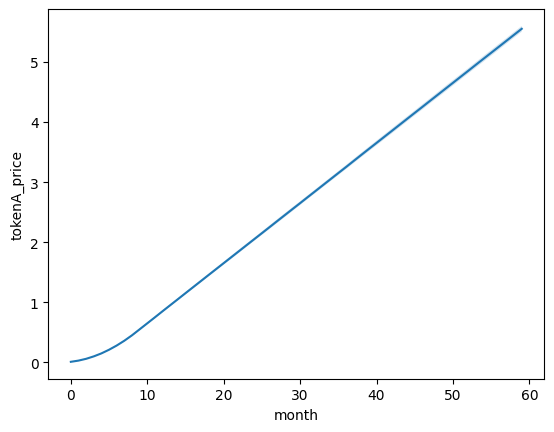

In [15]:
usm_fiat=UserGrowth_Stochastic(user_growth_distribution=scipy.stats.poisson,
                               user_growth_dist_parameters=params,add_to_userbase=True)

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=1000,currency='$')

investors=SupplyController_InvestorDumperSpaced(dumping_initial=100,dumping_final=1000000000,num_steps=ITERATIONS)

te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)

te.add_agent_pools([ap_fiat])

meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

What we observe is that TokenLab has issued a warning. The warning happens because the length of the parameter list was smaller than the total number of iterations. Therefore, in this case, TokenLab resorts to simply using the last item in the list as the parameter. In this case the parameter stays constant at 1000 after 10 iterations.